<a href="https://colab.research.google.com/github/pavithranair/Gender-classification-bias/blob/main/ACM_Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting bias in Gender classification

## 1. Import and Visualise the data

In [1]:
!pip install kaggle
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "~/.kaggle/"
os.environ['KAGGLE_USERNAME'] = 'pavithrapmnair'
os.environ['KAGGLE_KEY'] = '5d0de2c4f8c351f3f76541610e80f27d'

In [3]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
'username':"pavithrapmnair" ,
'key':"5d0de2c4f8c351f3f76541610e80f27d"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d abhikjha/utk-face-cropped

 95% 220M/232M [00:02<00:00, 123MB/s]
100% 232M/232M [00:02<00:00, 106MB/s]


In [5]:
!unzip utk-face-cropped.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkcropped/utkcropped/53_0_1_20170116192938845.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_1_20170117181950281.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_1_20170120222553113.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_1_20170120222956787.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_1_20170120223004304.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170104210010763.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170112215433623.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170112221930338.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170116192925824.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170116192934154.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170119205816456.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_3_20170104220848558.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_3_2017010

In [6]:
import numpy as np
import pandas as pd
import os
import cv2

wd = os.getcwd()
path = os.path.join(wd, "utkcropped/utkcropped")
files = os.listdir(path)
size = len(files)
print("Size: ", size)

Size:  23709


In [7]:
import cv2
images = []

for file in files:
    try:
   

        img = cv2.imread(path+'/'+file) # Using 0 to read image in grayscale mode
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        dim = (96, 96)
        img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA) # resize the original image to 60 * 60 * 3

        images.append(img)
    except Exception as ex:
        continue

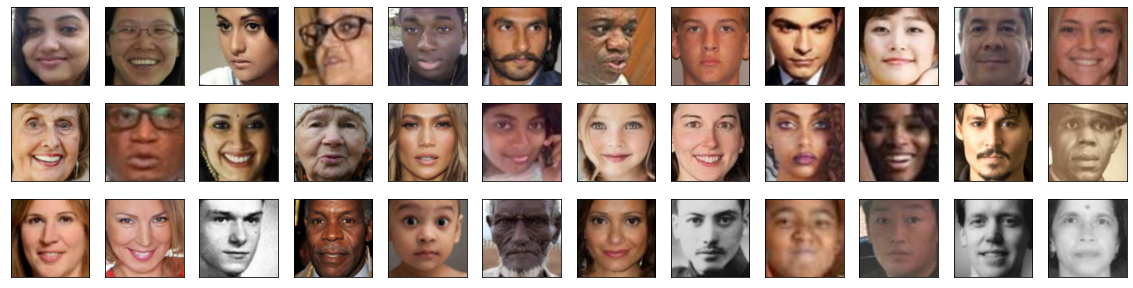

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
def visualize_data():
    images_to_show = 36
    per_row = 12
    fig = plt.figure(figsize=(20,5))
    for i in range(images_to_show):
        pos = (i // per_row, i % per_row)
        ax = plt.subplot2grid((int(images_to_show / per_row), per_row),
                              pos, xticks=[], yticks=[])
        ax.imshow(images[i])
    plt.show()
    fig.savefig('face_demo.png', dpi = 300, bbox_inches='tight')
    
visualize_data()

In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

['40_0_1_20170113174431769.jpg.chip.jpg']
Image shape: (200, 200, 3)


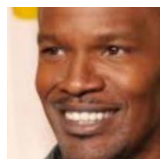

In [10]:
# Visualize random images
plt.figure()
plt.subplot(1, 2, 1)
face_img = view_random_image(path, "")

In the filename the second element represents the gender. '0' indicates male and '1' indicates female.

In [38]:
gender = [i.split('_')[1] for i in files]

values, counts = np.unique(gender, return_counts=True)
print(counts)

[12391 11317     1]


In [45]:
# Finding odd one out so there is a binary gender classification
list_3 = list()
say = 0
for i in gender:
   say=say+1
   if i=="3":
     print(say)
     list_3.append(say)

5970


In [49]:
for elem in list_3:
  gender[elem-1] = "1"

In [50]:
classes = []
for i in gender:
    i = int(i)
    classes.append(i)

In [51]:
from keras.utils.np_utils import to_categorical

In [52]:
categorical_labels = to_categorical(classes, num_classes=2)
categorical_labels[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [53]:
images=[]
i=0
for file in files:
  total=path+'/'+file
  print(total," i:",i)
  i=i+1
  image=cv2.imread(total)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(64,64))
  images.append(image)

Streaming output truncated to the last 5000 lines.
/content/utkcropped/utkcropped/31_1_1_20170115234845837.jpg.chip.jpg  i: 18709
/content/utkcropped/utkcropped/35_0_4_20170117195110413.jpg.chip.jpg  i: 18710
/content/utkcropped/utkcropped/20_0_0_20170117134631710.jpg.chip.jpg  i: 18711
/content/utkcropped/utkcropped/32_1_1_20170112215410367.jpg.chip.jpg  i: 18712
/content/utkcropped/utkcropped/25_0_1_20170116002228362.jpg.chip.jpg  i: 18713
/content/utkcropped/utkcropped/3_1_2_20161219151433163.jpg.chip.jpg  i: 18714
/content/utkcropped/utkcropped/32_1_1_20170116164948959.jpg.chip.jpg  i: 18715
/content/utkcropped/utkcropped/27_1_1_20170109131744869.jpg.chip.jpg  i: 18716
/content/utkcropped/utkcropped/23_1_3_20170119164553534.jpg.chip.jpg  i: 18717
/content/utkcropped/utkcropped/4_1_0_20170109194222722.jpg.chip.jpg  i: 18718
/content/utkcropped/utkcropped/39_1_0_20170103182742753.jpg.chip.jpg  i: 18719
/content/utkcropped/utkcropped/3_1_0_20170109190815163.jpg.chip.jpg  i: 18720
/con

In [54]:
x_data=np.array(images)
x_data.shape

(23709, 64, 64, 3)

In [55]:
x = np.squeeze(x_data)
x = x.astype('float32')
x /= 255
x.shape

(23709, 64, 64, 3)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_test = train_test_split(x, categorical_labels, test_size=0.2)
X_valid , X_test, y_valid, y_test = train_test_split(X_valid, y_test, test_size=0.5)

print("X_train", X_train.shape)
print("X_valid", X_valid.shape)
print("X_test", X_test.shape)

X_train (18967, 64, 64, 3)
X_valid (2371, 64, 64, 3)
X_test (2371, 64, 64, 3)


In [57]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense,Conv2D,Activation,MaxPool2D,Flatten,Dropout,BatchNormalization
from keras.utils import np_utils
from keras_preprocessing import image
from keras.callbacks import ModelCheckpoint

In [58]:
model=Sequential()
#1.katman
model.add(Conv2D(64, 3, input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#2.katman
model.add(Conv2D(64,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.5)) # %50 unutma işlemi

#3.katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4.katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))

#5.katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.5)) # %50 unutma işlemi

#tam baglanti katmani
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6))  # %60 unutma işlemi

#cıkış katmanı
model.add(Dense(2))
model.add(Activation("sigmoid")) #sınıflama işlemi 

#optimazyon basarım metrikleri
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.summary() #modelin özeti

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 62, 62, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 60, 60, 64)        0

In [59]:
root="/gdrive/My Drive/Kaggle/"

# en başarılı ağırlıkları kaydet
checkpointer = ModelCheckpoint(filepath=root + 'data/gender_face_model.h5', verbose=1, save_best_only=True)

epochs = 50
batchSize = 100 

# modeli çalıştır
hist = model.fit(X_train, y_train, 
                 epochs=epochs,
                 shuffle=True,
                 batch_size=batchSize, 
                 validation_data=(X_valid, y_valid),
                 callbacks=[checkpointer], verbose=2)

# save model to json
model_json = model.to_json()
with open(root + "data/gender_face_model.json", "w") as json_file:
    json_file.write(model_json)

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.76347, saving model to /gdrive/My Drive/Kaggle/data/gender_face_model.h5
190/190 - 24s - loss: 0.5760 - accuracy: 0.7430 - val_loss: 0.7635 - val_accuracy: 0.5116 - 24s/epoch - 124ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.76347 to 0.53415, saving model to /gdrive/My Drive/Kaggle/data/gender_face_model.h5
190/190 - 9s - loss: 0.3658 - accuracy: 0.8356 - val_loss: 0.5342 - val_accuracy: 0.6761 - 9s/epoch - 49ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.53415 to 0.28152, saving model to /gdrive/My Drive/Kaggle/data/gender_face_model.h5
190/190 - 10s - loss: 0.3231 - accuracy: 0.8559 - val_loss: 0.2815 - val_accuracy: 0.8756 - 10s/epoch - 50ms/step
Epoch 4/50

Epoch 4: val_loss improved from 0.28152 to 0.26369, saving model to /gdrive/My Drive/Kaggle/data/gender_face_model.h5
190/190 - 9s - loss: 0.2960 - accuracy: 0.8688 - val_loss: 0.2637 - val_accuracy: 0.8853 - 9s/epoch - 49ms/step
Epoch 5/50

Epoch 5: val_loss i

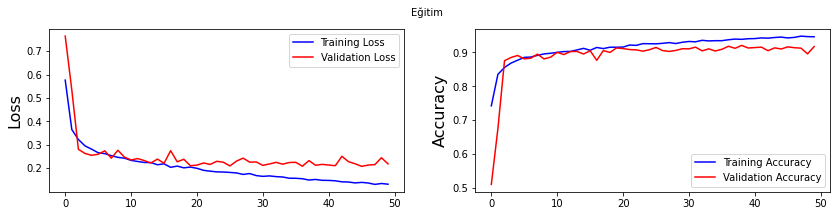

In [60]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

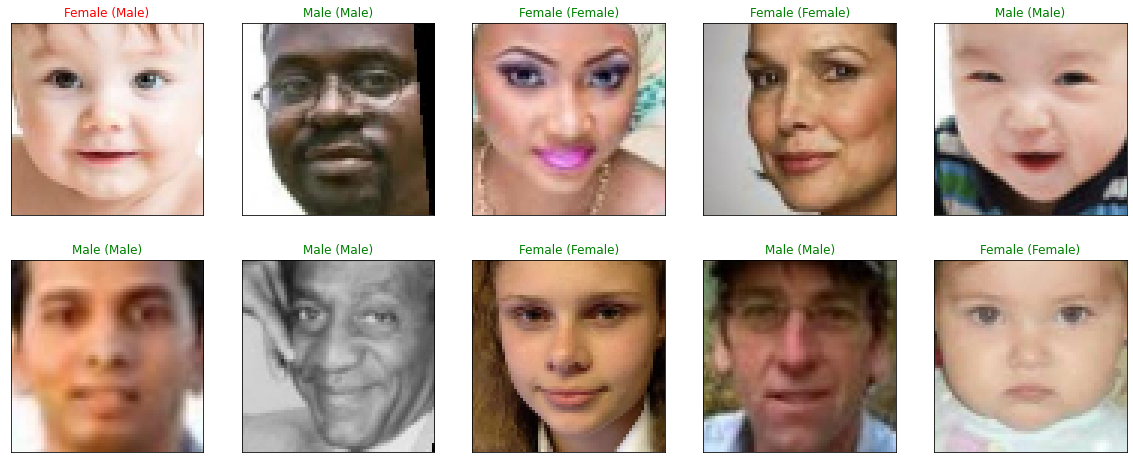

In [67]:
labels =["Male","Female"]
import matplotlib.pyplot as plt

Y = model.predict(X_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(Y[index])
    true_index = np.argmax(y_test[index])
    
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [68]:
import json
from keras.models import load_model
from keras.models import model_from_json
from keras.preprocessing import image

model_json = model.to_json()
with open("gender.json",'w') as json_file:
  json_file.write(model_json)

model.save('gender.h5')